In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.linalg as la
import winsound

In [2]:
from fbpconvnet import *
from train import *

In [8]:
fbpcnn = fbpconvnet()

X_train, X_test, E_train, E_test = load_dataset(100, 5, which='ellipses')

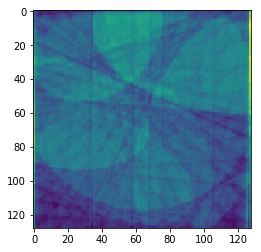

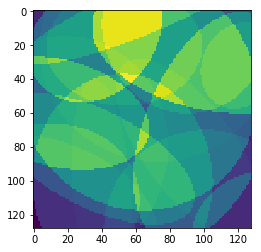

In [9]:
plt.figure(1);plt.imshow(X_train[0,:,:,0])
plt.figure(2);plt.imshow(E_train[0,:,:,0])

In [11]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='mean_squared_error',#euclidean_loss,
              metrics=['mean_squared_error'])
#               metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
          batch_size=1,
          epochs=200)
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

Epoch 1/200
100/100 [==============================] - 6s 60ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 2/200
100/100 [==============================] - 6s 55ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 3/200
100/100 [==============================] - 5s 54ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 4/200
100/100 [==============================] - 5s 53ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 5/200
100/100 [==============================] - 5s 53ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 6/200
100/100 [==============================] - 5s 53ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 7/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 8/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 9/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0026 - mean_squared_error:

100/100 [==============================] - 5s 52ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 74/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 75/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 76/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 77/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 78/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 79/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 80/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 81/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0019 - mean_squared_error: 0.0

100/100 [==============================] - 5s 52ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 146/200
100/100 [==============================] - 6s 58ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 147/200
100/100 [==============================] - 5s 54ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 148/200
100/100 [==============================] - 6s 55ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 149/200
100/100 [==============================] - 5s 54ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 150/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 151/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 152/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 153/200
100/100 [==============================] - 5s 51ms/step - loss: 0.0017 - mean_squared_er

In [17]:
X_recon = fbpcnn.predict(X_test)
test_loss, test_acc = fbpcnn.evaluate(X_recon, E_test)
print(test_loss, test_acc)

5/5 [==============================] - 0s 11ms/step
0.002980895107612014 0.002980883000418544


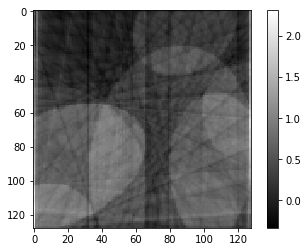

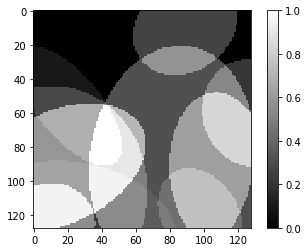

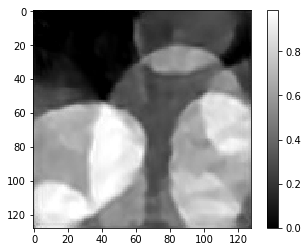

In [18]:
X_recon = fbpcnn.predict(X_test)
plt.figure(1);plt.imshow(X_test[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(2);plt.imshow(E_test[0,:,:,0], cmap='gray');plt.colorbar()
plt.figure(3);plt.imshow(X_recon[0,:,:,0], cmap='gray');plt.colorbar()

# X_recon_edit = (X_recon-1.5)*(X_recon>=1.5)
# plt.figure(3);plt.imshow(X_recon_edit[1,:,:,0], cmap='gray');plt.colorbar()

In [19]:
la.norm(E_test[0,:,:,0].flatten() - X_test[0,:,:,0].flatten())

20.285961433714853

In [20]:
la.norm(E_test[0,:,:,0].flatten() - X_recon[0,:,:,0].flatten())

7.458549845409746

In [15]:
sess = tf.InteractiveSession()
print(euclidean_loss(X_recon, E_train).eval())
sess.close()

[55.26104343]


In [11]:
np.amin(X_train)

-0.744609055695334

In [12]:
np.amax(E_train)

7.417872827639148

In [7]:
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)

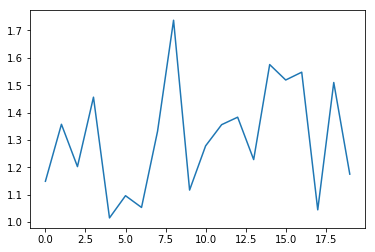

In [7]:
maxs = np.zeros(X_train.shape[0])
mins = np.zeros(X_train.shape[0])

for i in range(X_train.shape[0]):
    maxs[i] = np.amax(X_train[i,:,:,:])
    mins[i] = np.amin(X_train[i,:,:,:])
    
plt.plot(maxs-mins)